# PyStan Lin Reg

From https://users.obs.carnegiescience.edu/cburns/ipynbs/PyStan.html

$$ z_n \sim \mathcal N( \alpha + \beta_x x_n + \beta_y y_n,  \epsilon)$$


In [23]:

from numpy import *
Nobs = 20
x_true = random.uniform(0,10, size=Nobs)
y_true = random.uniform(-1,1, size=Nobs)
alpha_true = 0.5
beta_x_true = 1.0
beta_y_true = 10.0
eps_true = 0.5
z_true = alpha_true + beta_x_true*x_true + beta_y_true*y_true
z_obs = z_true + random.normal(0, eps_true, size=Nobs)

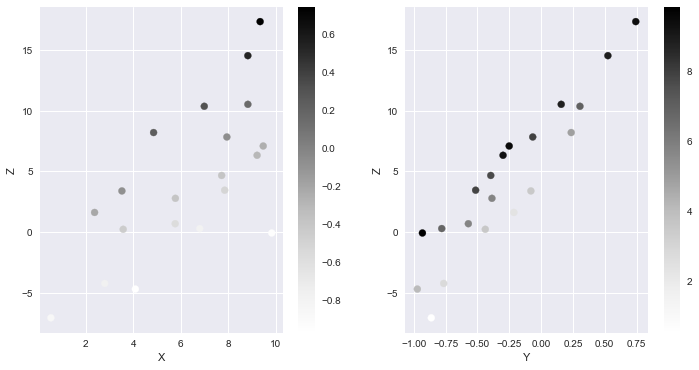

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_true, z_obs, c=y_true, marker='o')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1,2,2)
plt.scatter(y_true, z_obs, c=x_true, marker='o')
plt.colorbar()
plt.xlabel('Y')
plt.ylabel('Z')

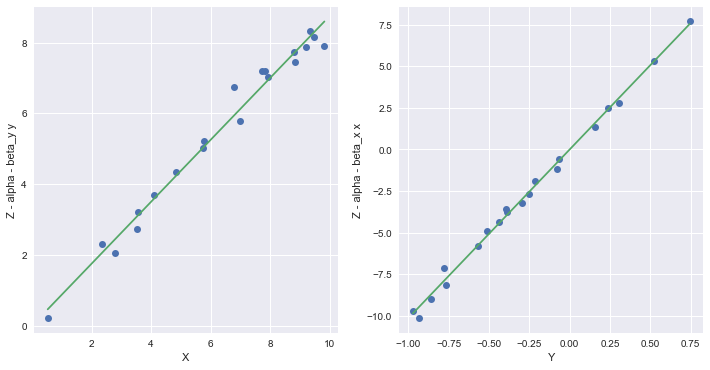

In [74]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x_true, z_obs - alpha - beta_y *y_true, 'o')
plt.xlabel('X')
plt.ylabel('Z - alpha - beta_y y')

# Now plot the model
xx = array([x_true.min(), x_true.max()])
plt.plot(xx, xx*beta_x)
#plt.plot(xx, xx*beta_x + eps, '--', color='k')
#plt.plot(xx, xx*beta_x - eps, '--', color='k')
plt.subplot(1,2,2)
plt.plot(y_true, z_obs-alpha-beta_x*x_true, 'o')
plt.xlabel('Y')
plt.ylabel('Z - alpha - beta_x x')

yy = array([y_true.min(), y_true.max()])
plt.plot(yy, yy*beta_y)
#plt.plot(yy, yy*beta_y + eps, '--', color='k')
#plt.plot(yy, yy*beta_y - eps, '--', color='k')

$$ z_n \sim \mathcal N( \alpha + \beta_x x_n + \beta_y y_n,  \epsilon)$$


In [25]:

model = """
data {
   int<lower=4> N; // Number of data points
   real x[N];      // the 1st predictor
   real y[N];      // the 2nd predictor
   real z[N];      // the outcome
}
parameters {
   real alpha;     // intercept
   real betax;     // x-slope
   real betay;     // y-slope
   real<lower=0> eps;       // dispersion
}
model {
   for (i in 1:N)
      z[i] ~ normal(alpha + betax * x[i] + betay * y[i], eps);
}"""

In [26]:
data = {'N':Nobs, 'x':x_true, 'y':y_true, 'z':z_obs}

In [27]:
import pystan
fit = pystan.stan(model_code=model, data=data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a87850813aab96ee1be5112f40cf12e0 NOW.


cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++
In file included from /usr/local/lib/python2.7/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /usr/local/lib/python2.7/dist-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /usr/local/lib/python2.7/dist-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /tmp/tmprI16mX/stanfit4anon_model_a87850813aab96ee1be5112f40cf12e0_3061569337203718836.cpp:339:
/usr/local/lib/python2.7/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
In file included from /usr/local/lib/python2.7/dist-packages/pystan/stan/lib/stan_math_2.11.0/stan/math/prim/mat.hpp:36:0,
                 from /usr/local/lib/python2.7/dist-packages/pys

In [28]:
print fit

Inference for Stan model: anon_model_a87850813aab96ee1be5112f40cf12e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   1.47    0.01   0.26   0.98   1.31   1.46   1.63   1.97  374.0   1.01
betax   0.87  1.8e-3   0.03   0.81   0.85   0.88    0.9   0.94  377.0   1.01
betay  10.15  8.4e-3   0.18   9.77  10.03  10.15  10.27   10.5  479.0    1.0
eps     0.38  3.1e-3   0.07   0.27   0.33   0.37   0.42   0.54  477.0    1.0
lp__     9.3    0.07   1.49   5.48   8.62   9.63  10.37  11.09  410.0    1.0

Samples were drawn using NUTS at Sun Nov 12 22:49:42 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


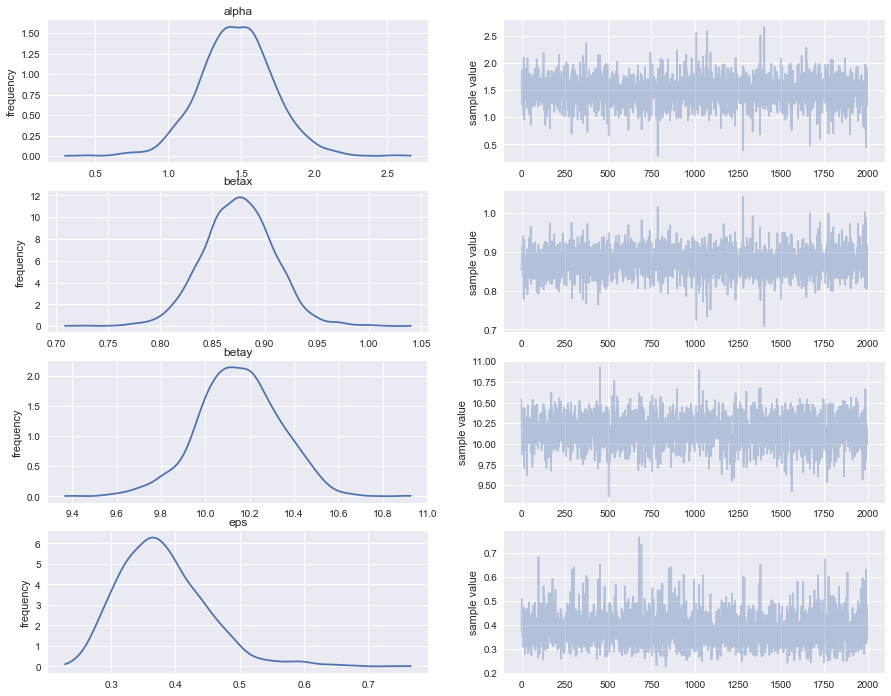

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

p = fit.plot()

In [79]:
samples = fit.extract(permuted=True)
alpha = median(samples['alpha'])
beta_x = median(samples['betax'])
beta_y = median(samples['betay'])
eps = median(samples['eps'])

(2000, 4)


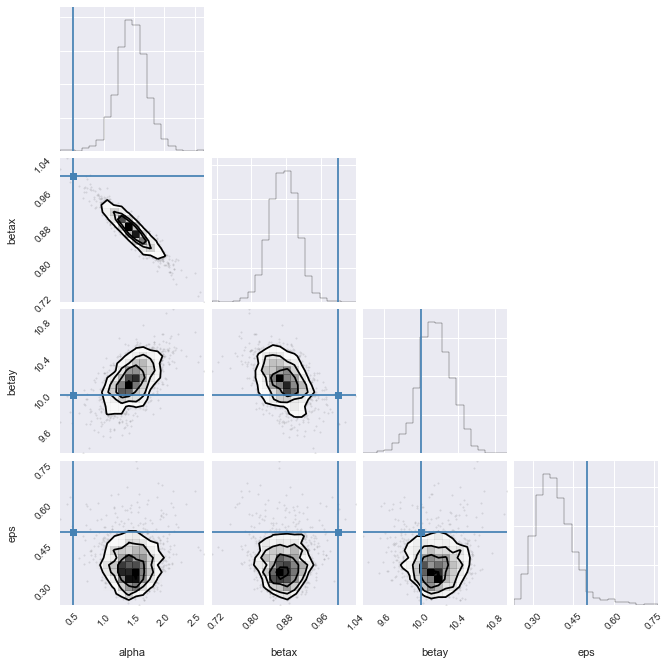

In [82]:
from pylab import rcParams
import corner

rcParams['figure.figsize'] = 20, 20

samples4corner = array([samples['alpha'],
                  samples['betax'], 
                  samples['betay'], 
                  samples['eps']]).T

print samples4corner.shape


tmp = corner.corner(samples4corner[:,:], labels=['alpha','betax','betay','eps'], 
                truths=[alpha_true, beta_x_true, beta_y_true, eps_true])

# PyMC3 Lin Regression

Copied from http://docs.pymc.io/notebooks/getting_started.html

$$
Y \sim N(\mu, \sigma_2) = \alpha+\beta_1 X_1 + \beta_2 X_2
$$


$$
\alpha \sim N(0, 100)
$$

$$
\beta_i \sim N(0, 100)
$$

$$
\sigma \sim | N(0, 1) |
$$



In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

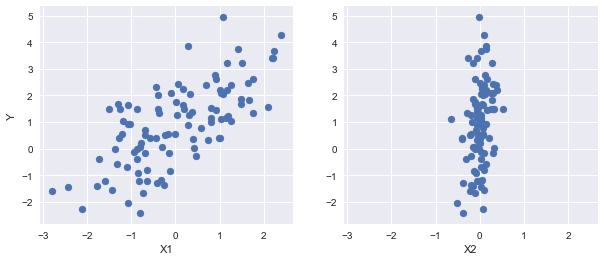

In [84]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [85]:
import pymc3 as pm

In [86]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)


In [49]:

help(pm.Normal)

Help on class Normal in module pymc3.distributions.continuous:

class Normal(pymc3.distributions.distribution.Continuous)
 |  Univariate normal log-likelihood.
 |  
 |  .. math::
 |  
 |     f(x \mid \mu, \tau) =
 |         \sqrt{\frac{\tau}{2\pi}}
 |         \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |  ========  ==========================================
 |  Support   :math:`x \in \mathbb{R}`
 |  Mean      :math:`\mu`
 |  Variance  :math:`\dfrac{1}{\tau}` or :math:`\sigma^2`
 |  ========  ==========================================
 |  
 |  Normal distribution can be parameterized either in terms of precision
 |  or standard deviation. The link between the two parametrizations is
 |  given by
 |  
 |  .. math::
 |  
 |     \tau = \dfrac{1}{\sigma^2}
 |  
 |  .. plot::
 |  
 |      import matplotlib.pyplot as plt
 |      import numpy as np
 |      import scipy.stats as st
 |      x = np.linspace(-5.0, 5.0, 1000)
 |      fig, ax = plt.subplots()
 |      f = lambda mu, sd : st.

In [87]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

logp = -148.98, ||grad|| = 0.0034288: 100%|██████████| 65/65 [00:00<00:00, 1501.84it/s]  


{'alpha': array(0.9065922498703003, dtype=float32),
 'beta': array([ 0.94849151,  2.60722876], dtype=float32),
 'sigma': array(0.9629727005958557, dtype=float32),
 'sigma_log__': array(-0.03773019462823868, dtype=float32)}

In [88]:

from scipy import optimize

map_estimate = pm.find_MAP(model=basic_model, fmin=optimize.fmin_powell)

map_estimate

logp = -148.98:   4%|▎         | 182/5000 [00:00<00:03, 1417.36it/s]

Optimization terminated successfully.
         Current function value: 148.984563
         Iterations: 4
         Function evaluations: 182


{'alpha': array(0.909089982509613, dtype=float32),
 'beta': array([ 0.95145124,  2.61455774], dtype=float32),
 'sigma': array(0.9656645655632019, dtype=float32),
 'sigma_log__': array(-0.03493872284889221, dtype=float32)}

In [89]:
with basic_model:

    # obtain starting values via MAP
    start = pm.find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step, start=start)

logp = -148.98:   4%|▎         | 180/5000 [00:00<00:02, 2221.43it/s]

Optimization terminated successfully.
         Current function value: 148.984563
         Iterations: 4
         Function evaluations: 182



100%|██████████| 5500/5500 [00:10<00:00, 547.79it/s]

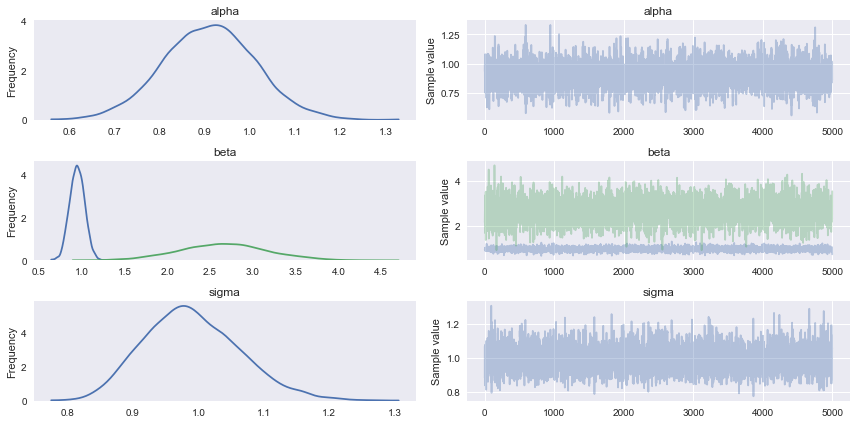

In [90]:
_ = pm.traceplot(trace)

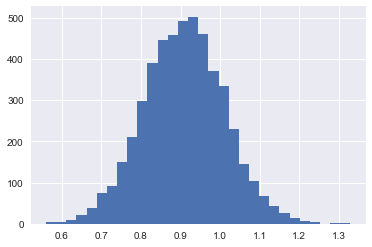

In [100]:
plt.hist(trace['alpha'],bins=30);

In [118]:
mean(trace['alpha']), mean(trace['beta']), mean(trace['sigma'])


(0.90893728, 1.8031281, 0.99117756)

# Visualizing single factor linear model

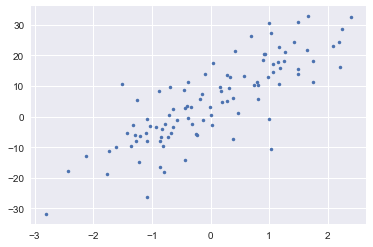

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha = 5
beta = 10
sigma = 8

# Size of dataset
size = 100

# Predictor variable
X = np.random.randn(size)
mu=alpha + beta*X

# Simulate outcome variable
Y = mu + np.random.randn(size)*sigma
plt.plot(X,Y, '.')

In [164]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=10)

    # Expected value of outcome
    mu = alpha + beta*X  # beware: pm and python variables interact!

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

    # obtain starting values via MAP
    start = pm.find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step, start=start)

logp = -356.65:   2%|▏         | 120/5000 [00:00<00:01, 2691.11it/s]

Optimization terminated successfully.
         Current function value: 356.651892
         Iterations: 3
         Function evaluations: 122



100%|██████████| 5500/5500 [00:06<00:00, 786.12it/s]

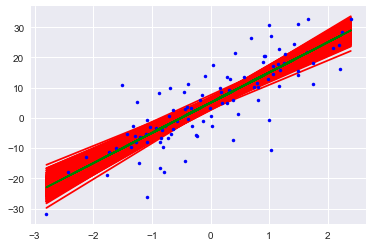

In [169]:
X_=np.array([[min(X)], [max(X)]])

for alpha, beta, sigma in zip(trace['alpha'][1::10], trace['beta'][1::10], trace['sigma'][1::10]):
    mu_ = alpha + beta*X_
    plt.plot(X_, mu_, 'r')

plt.plot(X,Y, 'b.')
plt.plot(X, mu, 'g-')

# Edward

From 

https://github.com/blei-lab/edward/blob/master/examples/bayesian_linear_regression.py

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


5000/5000 [100%] ██████████████████████████████ Elapsed: 4s | Acceptance Rate: 1.000


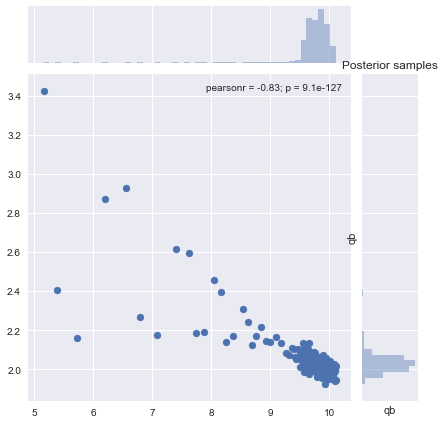

Mean squared error on test data:
0.300025
Displaying prior predictive samples.


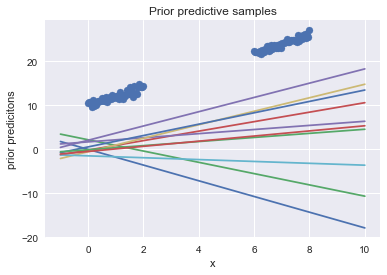

Displaying posterior predictive samples.


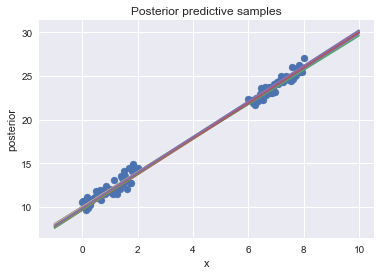

In [181]:
#!/usr/bin/env python
"""Bayesian linear regression using stochastic gradient Hamiltonian
Monte Carlo.

This version visualizes additional fits of the model.

References
----------
http://edwardlib.org/tutorials/supervised-regression
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from edward.models import Normal, Empirical


def build_toy_dataset(N, noise_std=0.5):
    X = np.concatenate([np.linspace(0, 2, num=N / 2),
                      np.linspace(6, 8, num=N / 2)])
    y = 2.0 * X + 10 + np.random.normal(0, noise_std, size=N)
    X = X.reshape((N, 1))
    return X, y


#ed.set_seed(42)

N = 100  # number of data points
D = 1  # number of features

# DATA
X_train, y_train = build_toy_dataset(N)
X_test, y_test = build_toy_dataset(N)

# MODEL
X = tf.placeholder(tf.float32, [N, D])
w = Normal(loc=tf.zeros(D), scale=tf.ones(D))
b = Normal(loc=tf.zeros(1), scale=tf.ones(1))
y = Normal(loc=ed.dot(X, w) + b, scale=tf.ones(N))

# INFERENCE
T = 5000                        # Number of samples.
nburn = 100                     # Number of burn-in samples.
stride = 10                    # Frequency with which to plot samples.
qw = Empirical(params=tf.Variable(tf.random_normal([T, D])))
qb = Empirical(params=tf.Variable(tf.random_normal([T, 1])))

inference = ed.SGHMC({w: qw, b: qb}, data={X: X_train, y: y_train})
inference.run(step_size=1e-3)


# CRITICISM

# Plot posterior samples.
sns.jointplot(qb.params.eval()[nburn:T:stride],
              qw.params.eval()[nburn:T:stride])
plt.title("Posterior samples")
plt.xlabel("qb")
plt.ylabel("qb")
plt.show()


# Posterior predictive checks.
plt.title("Prior predictive samples")
y_post = ed.copy(y, {w: qw, b: qb})
# This is equivalent to
# y_post = Normal(loc=ed.dot(X, qw) + qb, scale=tf.ones(N))


print("Mean squared error on test data:")
print(ed.evaluate('mean_squared_error', data={X: X_test, y_post: y_test}))

print("Displaying prior predictive samples.")
n_prior_samples = 10

w_prior = w.sample(n_prior_samples).eval()
b_prior = b.sample(n_prior_samples).eval()

plt.scatter(X_train, y_train)

inputs = np.linspace(-1, 10, num=400)
for ns in range(n_prior_samples):
    output = inputs * w_prior[ns] + b_prior[ns]
    plt.plot(inputs, output)
    
plt.xlabel("x")
plt.ylabel("prior predicitons")
plt.show()

print("Displaying posterior predictive samples.")
plt.title("Posterior predictive samples")
n_posterior_samples = 10

w_post = qw.sample(n_posterior_samples).eval()
b_post = qb.sample(n_posterior_samples).eval()

plt.scatter(X_train, y_train)

inputs = np.linspace(-1, 10, num=400)
for ns in range(n_posterior_samples):
    output = inputs * w_post[ns] + b_post[ns]
    plt.plot(inputs, output)

plt.xlabel("x")
plt.ylabel("posterior")

plt.show()